In [25]:
import warnings
warnings.filterwarnings("ignore")

In [26]:
# Import Required Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
import matplotlib.pyplot as plt

In [27]:
# Set Dataset Path
dataset_path = "Desktop/Data/train"

In [28]:
# Image Dimensions and Batch Size
img_height, img_width = 224, 224  # MobileNetV2 input size
batch_size = 32

In [29]:
# Data Augmentation and Preprocessing
datagen = ImageDataGenerator(
    rescale=1.0 / 255,         # Normalize pixel values
    rotation_range=30,         # Data Augmentation
    width_shift_range=0.3,
    height_shift_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    validation_split=0.2       # Split 20% for validation
)


In [30]:

# Load Training Data
train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',  # Categorical labels for multi-class classification
    subset='training'
)


Found 88 images belonging to 12 classes.


In [31]:
# Load Validation Data
val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',  # Categorical labels for multi-class classification
    subset='validation'
)

Found 22 images belonging to 12 classes.


In [32]:
# Load Pretrained MobileNetV2 Model (without the top layers)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))


In [33]:
# Freeze the base model layers
base_model.trainable = False

In [34]:
# Build the Model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),  # Global Average Pooling to reduce dimensions
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_data.num_classes, activation='softmax')  # Output layer with the number of classes
])


In [35]:

# Compile the Model
model.compile(
    optimizer='adam',  # Adam optimizer
    loss='categorical_crossentropy',  # For multi-class classification
    metrics=['accuracy']
)

In [36]:
# Train the Model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,  # Start with 10 epochs
    steps_per_epoch=train_data.samples // batch_size,
    validation_steps=val_data.samples // batch_size
)


Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.1607 - loss: 2.9261 - val_accuracy: 0.4091 - val_loss: 2.1547
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 784ms/step - accuracy: 0.1562 - loss: 2.8895 - val_accuracy: 0.4545 - val_loss: 2.0468
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.2500 - loss: 2.5357 - val_accuracy: 0.3636 - val_loss: 1.9223
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 842ms/step - accuracy: 0.1562 - loss: 2.3024 - val_accuracy: 0.5000 - val_loss: 1.8204
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.3229 - loss: 1.9716 - val_accuracy: 0.4545 - val_loss: 1.6298
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 895ms/step - accuracy: 0.4583 - loss: 1.8615 - val_accuracy: 0.4091 - val_loss: 1.7065
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.5670 - loss: 1.5484 - val_accuracy: 0.5909 - val_loss: 1.4503
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 782ms/step - accuracy: 0.4688 - loss: 1.6904 - val_accuracy: 0.5000 - val_loss: 1.4531
Epo

In [37]:
# Fine-Tuning: Unfreeze some layers of the base model and retrain
base_model.trainable = True


In [38]:
# It's important to recompile the model after unfreezing the layers
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),  # Lower learning rate for fine-tuning
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [39]:
# Continue Training (Fine-Tuning)
history_fine = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,  # Fine-tune for more epochs
    steps_per_epoch=train_data.samples // batch_size,
    validation_steps=val_data.samples // batch_size
)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 65s 18s/step - accuracy: 0.2996 - loss: 2.4980 - val_accuracy: 0.6818 - val_loss: 1.2429
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.2500 - loss: 2.4053 - val_accuracy: 0.5455 - val_loss: 1.3816
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 5s/step - accuracy: 0.0972 - loss: 2.6461 - val_accuracy: 0.6364 - val_loss: 1.3988
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 801ms/step - accuracy: 0.1875 - loss: 2.5780 - val_accuracy: 0.5909 - val_loss: 1.3035
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 5s/step - accuracy: 0.1627 - loss: 2.4755 - val_accuracy: 0.5455 - val_loss: 1.3383
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 787ms/step - accuracy: 0.1875 - loss: 2.2813 - val_accuracy: 0.6818 - val_loss: 1.2721
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 5s/step - accuracy: 0.1875 - loss: 2.5711 - val_accuracy: 0.5909 - val_loss: 1.3409
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 784ms/step - accuracy: 0.3333 - loss: 2.0575 - val_accuracy: 0.5000 - val_loss: 1.3889
Epoch

In [40]:
# Evaluate the Model
loss, accuracy = model.evaluate(val_data)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 850ms/step - accuracy: 0.6364 - loss: 1.2797
Validation Accuracy: 63.64%


In [41]:
# Save the Model
model.save("medical_plant_model_transfer_learning.h5")

In [42]:
# Plot Training and Validation Metrics
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

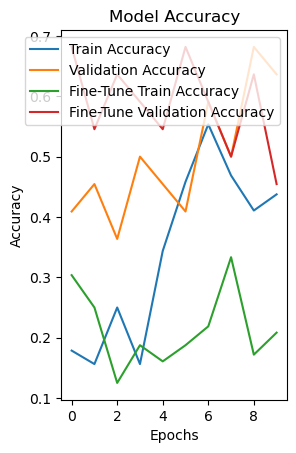

In [43]:
# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history_fine.history['accuracy'], label='Fine-Tune Train Accuracy')
plt.plot(history_fine.history['val_accuracy'], label='Fine-Tune Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

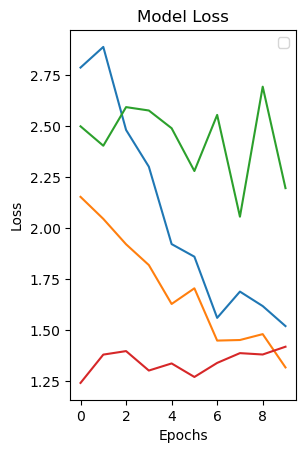

In [44]:
# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history_fine.history['loss'])
plt.plot(history_fine.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


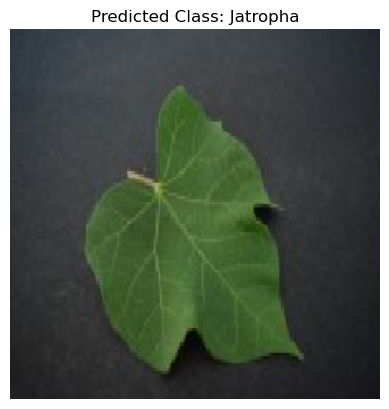

Predicted Class: Jatropha


In [45]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load the trained model
model = tf.keras.models.load_model("medical_plant_model_transfer_learning.h5")

# Set the path to the image you want to predict
img_path = "Desktop/Data/train/Jatropha/0006_0001.JPG"  # Replace with your image path

# Preprocess the image (resize and normalize)
img = image.load_img(img_path, target_size=(224, 224))  # Resize to 224x224 for MobileNetV2
img_array = image.img_to_array(img)  # Convert image to array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize pixel values to [0, 1]

# Make the prediction
predictions = model.predict(img_array)

# Get the class index with the highest probability
predicted_class_index = np.argmax(predictions, axis=1)[0]

# Get the class labels (you can modify this based on the classes in your dataset)
class_labels = list(train_data.class_indices.keys())  # Use class names from training data

# Get the predicted class name
predicted_class_name = class_labels[predicted_class_index]

# Display the image and the predicted class
plt.imshow(img)
plt.title(f"Predicted Class: {predicted_class_name}")
plt.axis('off')  # Turn off axis
plt.show()

print(f"Predicted Class: {predicted_class_name}")
